In [50]:
from img_show import *
import cv2
import numpy as np
import matplotlib.pyplot as plt 

def yuv422_to_rgb2(frame_raw, width, height):
        frame_raw = np.frombuffer(frame_raw, dtype=np.uint8)

        # C-contiguous 배열로 변환
        frame_raw = np.ascontiguousarray(frame_raw)
        Y1  = frame_raw[0::4]
        U = frame_raw[1::4]
        Y2  = frame_raw[2::4]
        V = frame_raw[3::4]
        
        UV = np.empty((height*width), dtype=np.uint8)
        YY = np.empty((height*width), dtype=np.uint8)
        
        UV[0::2] = U
        UV[1::2] = V
        YY[0::2] = Y1
        YY[1::2] = Y2
        
        UV = UV.reshape((height, width))
        YY = YY.reshape((height, width))
        
        frame_uyvy = cv2.merge([UV, YY])
        return frame_uyvy

In [51]:
w=160
h=120
w=160
h=120
data_from_txt,len_=get_image_from_txtFile(w,h,"../output.txt",imagetype.YUV)
print(data_from_txt.shape,len_)

(38400,) 38400


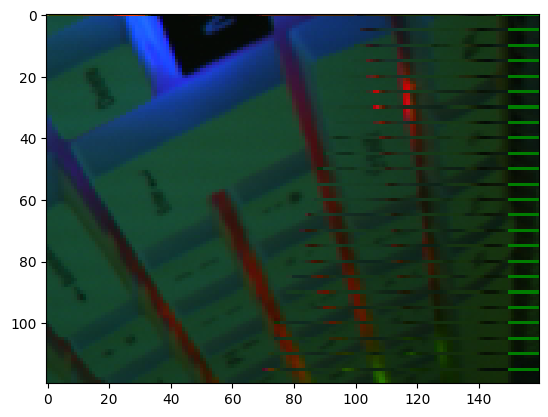

In [52]:

rgb_image = yuv422_to_rgb(data_from_txt, w, h)

plt.imshow(rgb_image)
cv2.imshow("img",rgb_image)
cv2.waitKey(0)
cv2.destroyAllWindows()